# **1. Perkenalan Dataset**


## **Sumber Dataset**

Dataset yang digunakan dalam eksperimen ini adalah **Synthetic HR Employee Burnout Dataset** yang diperoleh dari Kaggle:

**Link Dataset**: https://www.kaggle.com/datasets/ankam6010/synthetic-hr-burnout-dataset

## **Deskripsi Dataset**

Dataset ini merupakan data sintetis yang mensimulasikan kondisi burnout karyawan dalam suatu organisasi. Dataset ini dirancang untuk membantu memahami faktor-faktor yang berkontribusi terhadap burnout karyawan dan membangun model prediksi untuk mengidentifikasi karyawan yang berisiko mengalami burnout.

### **Informasi Dataset:**
- **Jumlah Data**: 22,750 records
- **Jumlah Fitur**: 9 kolom
- **Target Variable**: Burn Rate (tingkat burnout karyawan)

### **Fitur-fitur Dataset:**
1. **Employee ID**: ID unik untuk setiap karyawan
2. **Date of Joining**: Tanggal karyawan bergabung dengan perusahaan
3. **Gender**: Jenis kelamin karyawan (Male/Female)
4. **Company Type**: Jenis perusahaan (Service/Product)
5. **WFH Setup Available**: Ketersediaan fasilitas Work From Home (Yes/No)
6. **Designation**: Level jabatan karyawan (0.0 - 5.0)
7. **Resource Allocation**: Alokasi sumber daya untuk karyawan (1.0 - 10.0)
8. **Mental Fatigue Score**: Skor kelelahan mental (0.0 - 10.0)
9. **Burn Rate**: Tingkat burnout karyawan (0.0 - 1.0) - **TARGET VARIABLE**

### **Tujuan Penggunaan Dataset:**
Dataset ini akan digunakan untuk membangun model machine learning yang dapat memprediksi tingkat burnout karyawan berdasarkan berbagai faktor seperti gender, tipe perusahaan, fasilitas WFH, jabatan, alokasi sumber daya, dan tingkat kelelahan mental. Model ini dapat membantu departemen HR untuk mengidentifikasi karyawan yang berisiko tinggi mengalami burnout dan mengambil tindakan preventif yang tepat.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
data_path = "../synthetic_employee_burnout_raw/synthetic_employee_burnout.csv"
df = pd.read_csv(data_path)

df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0


In [3]:
print("Ukuran dataset:", df.shape)
df.info()

Ukuran dataset: (2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   object 
 1   Age                2000 non-null   int64  
 2   Gender             2000 non-null   object 
 3   JobRole            2000 non-null   object 
 4   Experience         2000 non-null   int64  
 5   WorkHoursPerWeek   2000 non-null   int64  
 6   RemoteRatio        2000 non-null   int64  
 7   SatisfactionLevel  2000 non-null   float64
 8   StressLevel        2000 non-null   int64  
 9   Burnout            2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


In [4]:
df.describe()

,Age,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,40.694500,10.074500,49.588000,49.973000,2.995230,5.43200,0.064500
std,11.286756,9.148267,11.832424,29.151298,1.155431,2.88089,0.245703
min,22.000000,0.000000,30.000000,0.000000,1.000000,1.00000,0.000000
25%,31.000000,3.000000,39.000000,24.000000,2.000000,3.00000,0.000000
50%,41.000000,7.000000,49.000000,49.000000,3.025000,5.00000,0.000000
75%,50.000000,15.000000,60.000000,75.000000,4.000000,8.00000,0.000000
max,60.000000,39.000000,70.000000,100.000000,5.000000,10.00000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

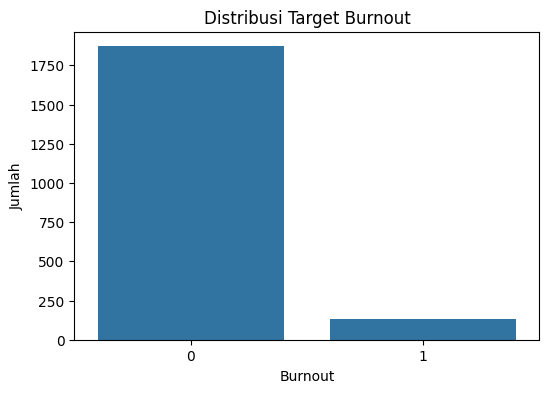

In [5]:
target_column = "Burnout"

plt.figure(figsize=(6,4))
sns.countplot(x=target_column, data=df)
plt.title("Distribusi Target Burnout")
plt.xlabel("Burnout")
plt.ylabel("Jumlah")
plt.show()

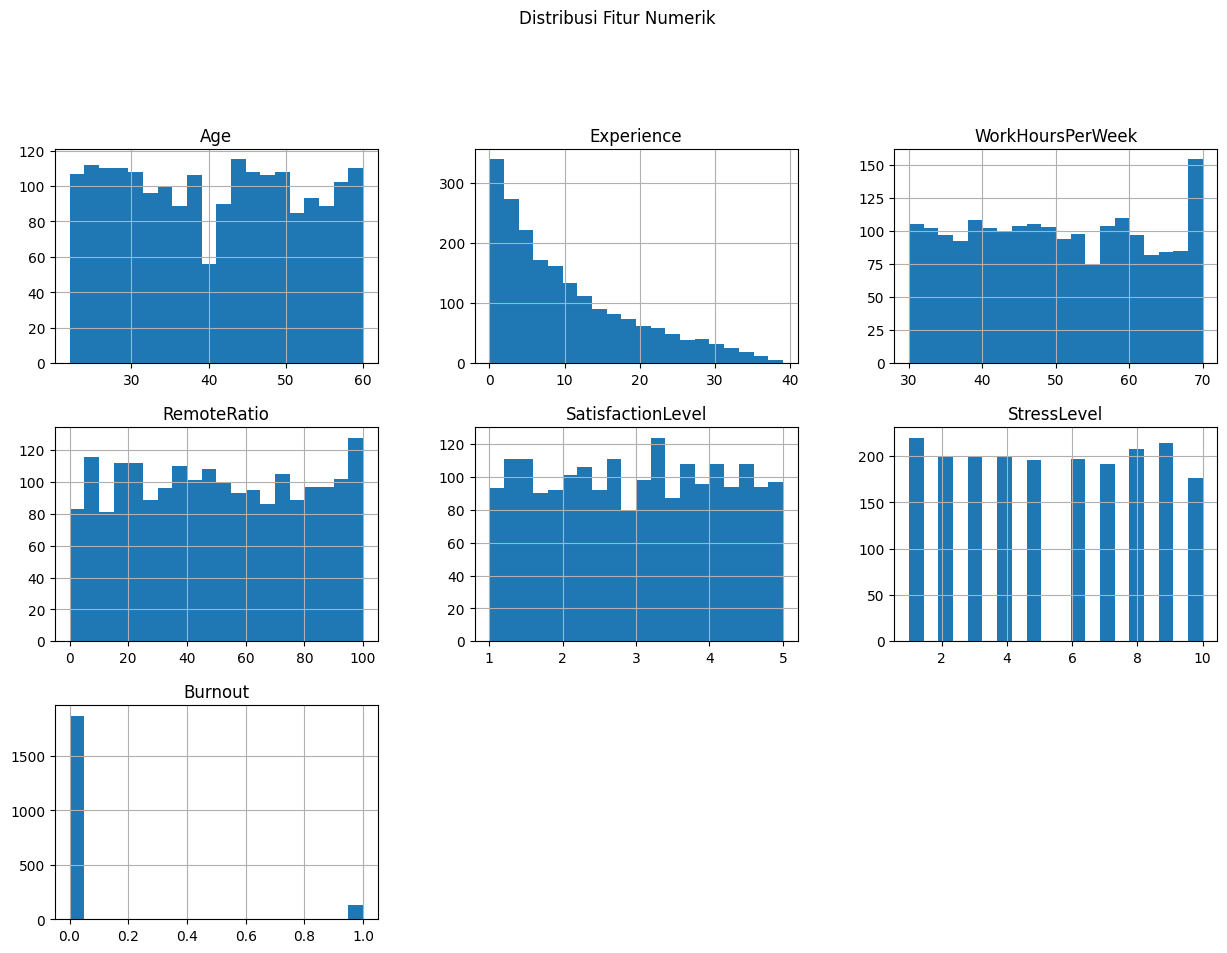

In [6]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_columns].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi Fitur Numerik", y=1.02)
plt.show()

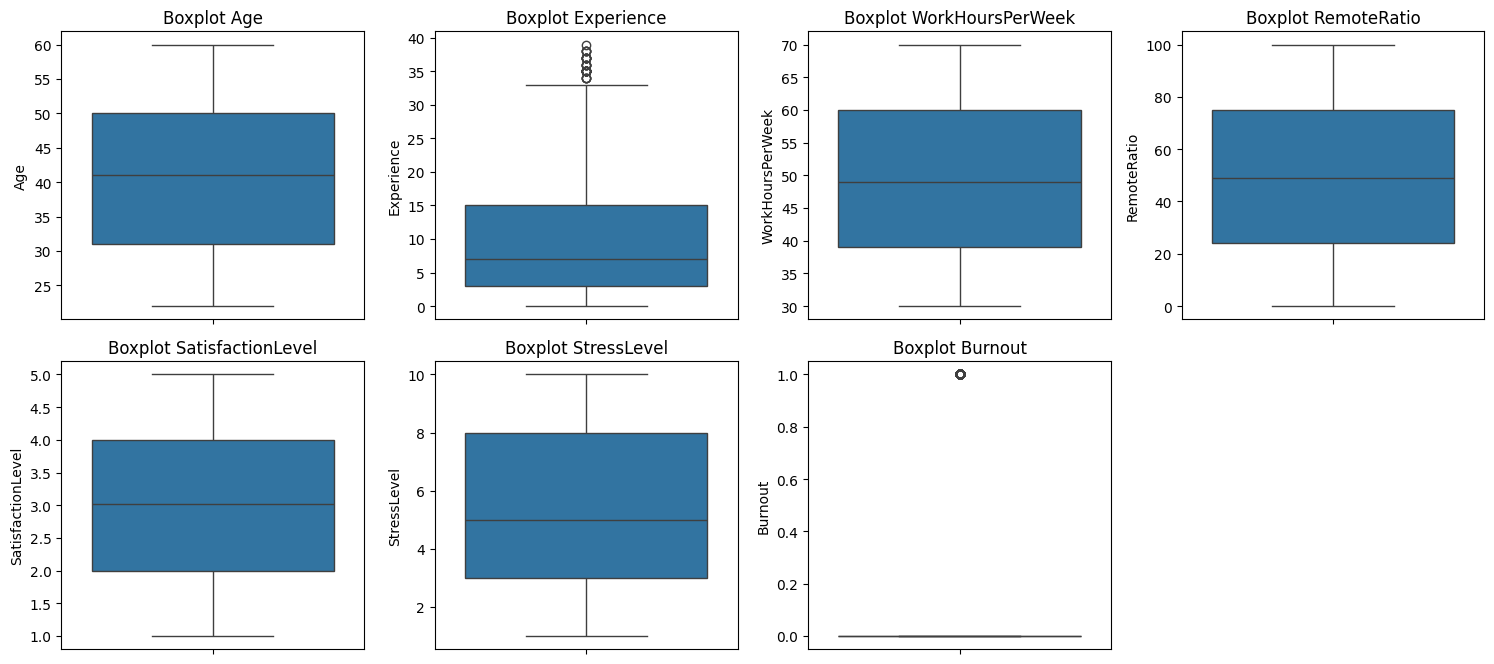

In [7]:
# mengecek outlier menggunakan boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

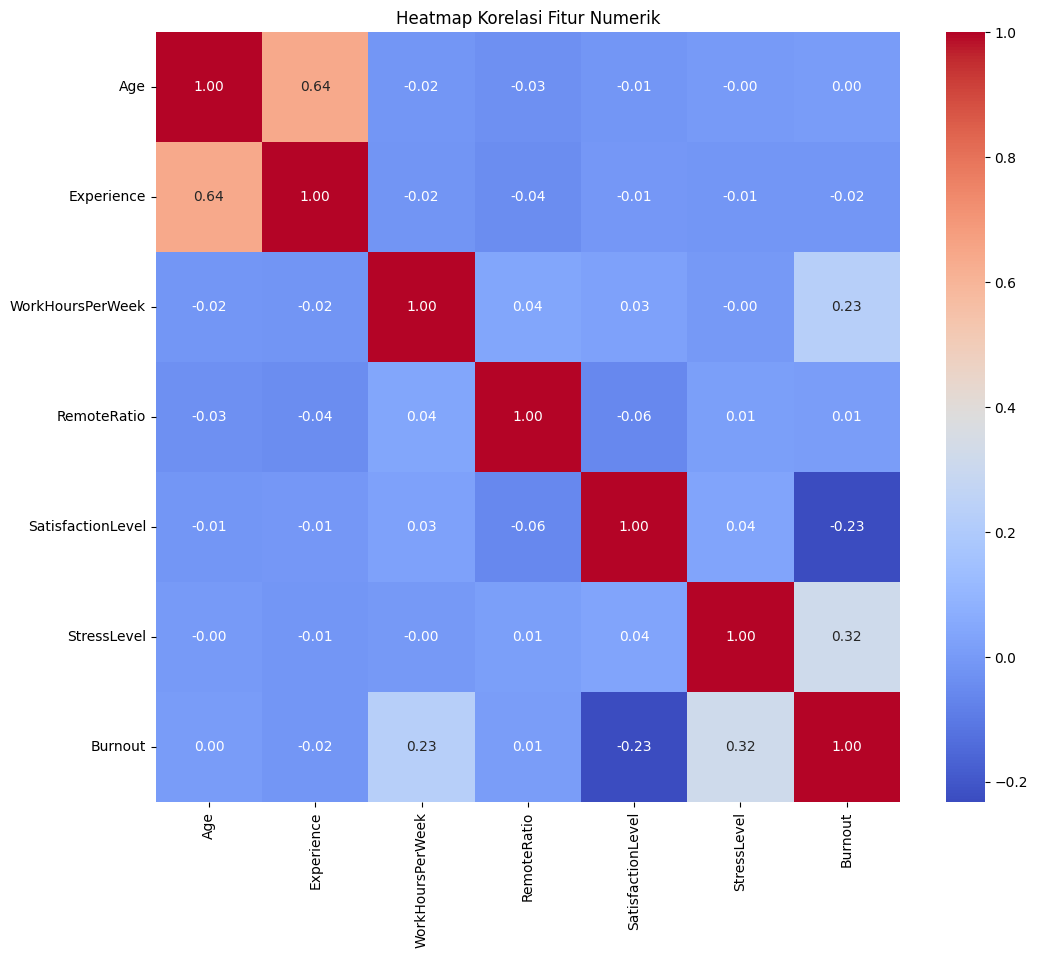

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
df.isnull().sum()

Name                 0
Age                  0
Gender               0
JobRole              0
Experience           0
WorkHoursPerWeek     0
RemoteRatio          0
SatisfactionLevel    0
StressLevel          0
Burnout              0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
categorical_columns = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [12]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,73,32,1,0,3,60,21,4.40,1,0
1,79,40,0,1,9,47,67,2.09,2,0
2,87,33,0,1,2,44,20,2.58,3,0
3,33,35,0,3,6,44,70,3.23,8,0
4,39,59,1,4,8,38,46,4.41,1,0


In [13]:
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (1468, 9)
Data uji: (368, 9)


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **6. Export Hasil Preprocessing**

In [15]:
import os

output_folder = "../synthetic_employee_burnout_preprocessing"
os.makedirs(output_folder, exist_ok=True)

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_df.to_csv(f"{output_folder}/X_train.csv", index=False)
X_test_df.to_csv(f"{output_folder}/X_test.csv", index=False)
y_train.to_csv(f"{output_folder}/y_train.csv", index=False)
y_test.to_csv(f"{output_folder}/y_test.csv", index=False)

print("Hasil preprocessing berhasil disimpan!")
print(f"Lokasi: {output_folder}/")
print(f"   - X_train.csv: {X_train_df.shape}")
print(f"   - X_test.csv: {X_test_df.shape}")
print(f"   - y_train.csv: {y_train.shape}")
print(f"   - y_test.csv: {y_test.shape}")

Hasil preprocessing berhasil disimpan!
Lokasi: ../synthetic_employee_burnout_preprocessing/
   - X_train.csv: (1468, 9)
   - X_test.csv: (368, 9)
   - y_train.csv: (1468,)
   - y_test.csv: (368,)
